### Import packages

In [3]:
sessionInfo()

R version 4.3.1 (2023-06-16 ucrt)
Platform: x86_64-w64-mingw32/x64 (64-bit)
Running under: Windows 10 x64 (build 19045)

Matrix products: default


locale:
[1] LC_COLLATE=English_United States.utf8 
[2] LC_CTYPE=English_United States.utf8   
[3] LC_MONETARY=English_United States.utf8
[4] LC_NUMERIC=C                          
[5] LC_TIME=English_United States.utf8    

time zone: Asia/Taipei
tzcode source: internal

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] rlang_1.1.1

loaded via a namespace (and not attached):
 [1] digest_0.6.33       IRdisplay_1.1       utf8_1.2.3         
 [4] base64enc_0.1-3     fastmap_1.1.1       glue_1.6.2         
 [7] htmltools_0.5.6     repr_1.1.6          lifecycle_1.0.3    
[10] cli_3.6.1           fansi_1.0.4         vctrs_0.6.3        
[13] pbdZMQ_0.3-10       compiler_4.3.1      tools_4.3.1        
[16] evaluate_0.21       pillar_1.9.0        crayon_1.5.2       
[19] j

In [10]:
library(ARTool)
library(rlang)
library(tidyr)
library(rcompanion)
library(rstatix)
library(ggplot2)
library(plyr)
library(ini)
library(rstudioapi)
library(stringr)

### Read configuration file

In [11]:
getwd()

[1] "W:/Me/Research/心理/randomGeneration/analysis/dataAnalysis"

In [12]:
# Read the config file
configPath <- paste(getwd(), "/config.ini", sep = "")
config <- read.ini(configPath, encoding = "UTF-8")

# Access and print the values
# print(config)


Note that the method of using the configuration file is different in jupyter notebook. We can utilize the fact that the working directory is always the current folder of the notebook. We can then use the relative path to the configuration file.

In [13]:
#read csv file
dataRandom <- read.csv(config$FILES$rgCalcResultsCSVFile, header = TRUE, sep = ",")
print(dataRandom)

   subject type sample.size      R    RNG     NSQ   RNG2      TPI   runs coupon
1        1 snum         303 0.8557 0.5690  0.0000 0.5791 100.6645 0.6467   8.82
2        1 fnum         304 0.8212 0.5794  0.0000 0.5684 100.3311 0.7209   9.74
3        1 sact         293 0.6296 0.5637  0.0000 0.5464  91.2371 0.7658  11.60
4        1 fact         297 0.8012 0.6038  2.8571 0.5530  97.6271 0.9441  12.95
5        2 snum         302 0.3257 0.5718  0.0000 0.5755  90.5000 0.7176   8.54
6        2 fnum         306 0.5441 0.5794  0.0000 0.5621  82.8947 0.9880   9.77
7        2 sact         306 0.3267 0.5762  0.0000 0.5652  88.3224 0.8588  12.91
8        2 fact         302 0.1787 0.5815  0.0000 0.5588  78.0000 0.4802  15.94
9        3 snum         299 1.4091 0.5877  0.0000 0.5754  77.2727 0.2121  14.74
10       3 fnum         294 3.4370 0.6171  0.0000 0.5866  65.2397 0.1117  21.69
11       3 sact         304 1.3140 0.5850  0.0000 0.5615  73.0132 0.5815  15.11
12       3 fact         298 2.3206 0.623

### Extract (s or f) and (num or act) respectively as two variables

In [14]:
speed = c()
numOrAct = c()
for (i in dataRandom$type) {
  speed = append(speed, substr(i, 1, 1))
  numOrAct = append(numOrAct, substr(i, 2, 4))
}

In [15]:
dataRandomTry = data.frame(dataRandom[1], speed, numOrAct, dataRandom[,c(4:60)])
dataRandomTry

subject,speed,numOrAct,R,RNG,NSQ,RNG2,TPI,runs,coupon,⋯,X.34,mean.repetition.gap,median.repetition.gap,modal.repetition.gap,Phi.index.values..orders.2.to.7.,X.35,X.36,X.37,X.38,X.39
<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,s,num,0.8557,0.5690,0.0000,0.5791,100.6645,0.6467,8.82,⋯,1,5.97,6,5,-5.625409,-7.765057,-6.098775,-6.379558,-3.074461,-2.684844
1,f,num,0.8212,0.5794,0.0000,0.5684,100.3311,0.7209,9.74,⋯,2,5.98,6,5,-4.779627,-5.883110,-5.536043,-4.506390,-2.554742,-2.004027
1,s,act,0.6296,0.5637,0.0000,0.5464,91.2371,0.7658,11.60,⋯,4,5.95,5,1,-1.925590,-3.151447,-4.676675,-2.599943,-0.293552,-1.795716
1,f,act,0.8012,0.6038,2.8571,0.5530,97.6271,0.9441,12.95,⋯,3,5.95,5,3,-6.055490,-4.049404,-1.494609,-3.011894,-1.780598,-0.595734
2,s,num,0.3257,0.5718,0.0000,0.5755,90.5000,0.7176,8.54,⋯,0,5.99,6,5,-3.413783,-6.978352,-7.515234,-7.042542,-1.700914,-1.339166
2,f,num,0.5441,0.5794,0.0000,0.5621,82.8947,0.9880,9.77,⋯,0,5.98,6,1,-0.486516,-4.132938,-3.750226,-3.825830,-3.787767,-3.088955
2,s,act,0.3267,0.5762,0.0000,0.5652,88.3224,0.8588,12.91,⋯,6,5.96,5,1,-1.107737,-1.273240,-1.891088,-2.889044,-2.457473,-2.805451
2,f,act,0.1787,0.5815,0.0000,0.5588,78.0000,0.4802,15.94,⋯,8,5.79,4,1,4.351554,0.349138,-1.026613,1.174050,-1.530503,-2.290337
3,s,num,1.4091,0.5877,0.0000,0.5754,77.2727,0.2121,14.74,⋯,13,5.77,4,1,5.955443,3.927854,-1.153519,0.140525,3.195858,-1.648205


### Drop out undesired participant

In [16]:
dataRandom <- subset(dataRandom, subject != "3")
dataRandomTry <- subset(dataRandomTry, subject != "3")

# Indices Testing

## R

### art analysis and effect size

In [17]:
resultRand <- art(R ~ factor(speed)*factor(numOrAct) + Error(factor(subject)), data=dataRandomTry)
result = anova(resultRand)
print(result, verbose = TRUE)
#capture.output(result,file="W:/Me/Research/心理/實驗結果/test.xls")

Analysis of Variance of Aligned Rank Transformed Data

Table Type: Repeated Measures Analysis of Variance Table (Type I) 
Model: Repeated Measures (aov)
Response: art(R)

                                 Error Df Df.res Sum Sq Sum Sq.res Mean Sq
1 factor(speed)                  Withn  1     21 595.12     1070.2  595.12
2 factor(numOrAct)               Withn  1     21 338.00     1244.0  338.00
3 factor(speed):factor(numOrAct) Withn  1     21 264.50     1144.3  264.50
                                 F value    Pr(>F)   
1 factor(speed)                  11.6773 0.0025912 **
2 factor(numOrAct)                5.7058 0.0263760  *
3 factor(speed):factor(numOrAct)  4.8543 0.0388799  *
---
Signif. codes:   0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 


### Result with effect size

In [18]:
result$eta.sq.part = with(result, `Sum Sq`/(`Sum Sq` + `Sum Sq.res`))
result

,Term,Error,Df,Df.res,Sum Sq,Sum Sq.res,Mean Sq,F value,Pr(>F),eta.sq.part
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,factor(speed),Within,1,21,595.125,1070.25,595.125,11.677295,0.002591209,0.3573519
2,factor(numOrAct),Within,1,21,338.000,1244.00,338.000,5.705788,0.026375965,0.2136536
3,factor(speed):factor(numOrAct),Within,1,21,264.500,1144.25,264.500,4.854271,0.038879862,0.1877551


The interaction is significant and both main effects are significant.

## Bootstrapping to get the power of this aligned rank test

In [19]:
#Bootstrapping participants to do power analysis
numbersToDrawFrom = c(1,2,4,5,6,7,8,9)
bootstrappedParticipants = c()
for (i in 1:1000) {
  bootstrappedParticipants = append(bootstrappedParticipants, sample(numbersToDrawFrom, 8, replace = TRUE))
}
bootstrappedParticipants = matrix(bootstrappedParticipants, nrow = 1000, ncol = 8)
bootstrappedParticipants = as.data.frame(bootstrappedParticipants)

#Check the first two instances of the bootstrapped participants
bootstrappedParticipants[1,]
bootstrappedParticipants[2,]

,V1,V2,V3,V4,V5,V6,V7,V8
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,5,9,4,6,6,7,8,6


,V1,V2,V3,V4,V5,V6,V7,V8
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,7,9,2,4,9,8,1,6


In [20]:
#create a data frame to store the p values
pValues = data.frame()

for (combination in 1:1000) {
  btData = data.frame()
  count <- list()
  for (i in 1:9) {
  count[[i]] <- 0
  }
  for (participant in bootstrappedParticipants[combination,]) {
    addThisTime = dataRandomTry[dataRandomTry$subject == participant,]
    count[[participant]] = count[[participant]] + 1
    addThisTime$subject = paste0(c(addThisTime$subject, count[[participant]]), collapse = "_")
    btData = rbind(btData, addThisTime)
    # print(btData$subject)
  }
  # print(btData$subject)
  resultRand <- art(R ~ factor(speed)*factor(numOrAct) + Error(factor(subject)), data=btData)
  result = anova(resultRand)
  # print(result, verbose = TRUE)
  print(result$"Pr(>F)") 
  pValues = rbind(pValues, result$"Pr(>F)")
}
pValues[1]

[1] 1.804587e-05 2.528466e-04 1.067818e-03
[1] 0.009596459 0.081268725 0.170886733
[1] 0.0424101 0.8466661 0.6232773
[1] 6.707647e-06 4.305624e-05 1.179464e-03
[1] 0.107194267 0.001562849 0.214980512
[1] 0.05817591 0.08852524 0.17368092
[1] 2.600997e-05 3.223766e-04 2.572961e-03
[1] 0.000411192 0.001969108 0.337956944
[1] 0.003135053 0.026385319 0.129461325
[1] 0.0001238197 0.0057571890 0.0025246556
[1] 0.0003353562 0.0009265073 0.0013869343
[1] 0.004387672 0.056629685 0.056366951
[1] 2.321847e-05 5.700429e-05 1.434921e-04
[1] 0.0008822427 0.0681824204 0.0544558722
[1] 0.001111682 0.028132045 0.102374819
[1] 0.01988595 0.19613714 0.25995776
[1] 0.01064780 0.08803039 0.07761776
[1] 0.0007804607 0.0366535758 0.0205499656
[1] 3.652327e-05 2.523559e-04 8.330943e-02
[1] 0.0004609114 0.0002931703 0.0017969215
[1] 0.01593071 0.54103933 0.55679522
[1] 0.02734801 0.43023801 0.17212808
[1] 0.01732691 0.22560388 0.06093774
[1] 0.01263279 0.07229748 0.08146284
[1] 0.0007972276 0.0320672532 0.03139

X1.80458706435533e.05
<dbl>
1.804587e-05
9.596459e-03
4.241010e-02
6.707647e-06
1.071943e-01
5.817591e-02
2.600997e-05
4.111920e-04
3.135053e-03


In [21]:
#effect 1
count1 <- sum(pValues[1] <0.05)
count1
power1 = count1/10000
print(power1)

[1] 945

[1] 0.0945


In [22]:
#effect 2
count2 <- sum(pValues[2] <0.05)
count2
power2 = count2/10000
print(power2)

[1] 641

[1] 0.0641


In [23]:
#effect 3
count3 <- sum(pValues[3] <0.05)
count3
power3 = count3/10000
print(power3)

[1] 540

[1] 0.054


### Use the non-parametric method to calculate the simple main effects

#### speed

In [42]:
speedS = subset(dataRandomTry, speed == "s")
speedF = subset(dataRandomTry, speed == "f")
# speedS = speedS[,c("subject","R")]
# speedF = speedF[,c("subject","R")]
speedS

,subject,speed,numOrAct,R,RNG,NSQ,RNG2,TPI,runs,coupon,⋯,X.34,mean.repetition.gap,median.repetition.gap,modal.repetition.gap,Phi.index.values..orders.2.to.7.,X.35,X.36,X.37,X.38,X.39
,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,s,num,0.8557,0.5690,0.0000,0.5791,100.6645,0.6467,8.82,⋯,1,5.97,6,5,-5.625409,-7.765057,-6.098775,-6.379558,-3.074461,-2.684844
3,1,s,act,0.6296,0.5637,0.0000,0.5464,91.2371,0.7658,11.60,⋯,4,5.95,5,1,-1.925590,-3.151447,-4.676675,-2.599943,-0.293552,-1.795716
5,2,s,num,0.3257,0.5718,0.0000,0.5755,90.5000,0.7176,8.54,⋯,0,5.99,6,5,-3.413783,-6.978352,-7.515234,-7.042542,-1.700914,-1.339166
7,2,s,act,0.3267,0.5762,0.0000,0.5652,88.3224,0.8588,12.91,⋯,6,5.96,5,1,-1.107737,-1.273240,-1.891088,-2.889044,-2.457473,-2.805451
13,4,s,num,0.3068,0.5591,0.0000,0.5615,89.5000,0.8239,11.00,⋯,3,5.97,5,1,-1.687797,-4.801892,-2.821249,-4.061913,-1.856127,-1.226355
15,4,s,act,0.3336,0.5596,0.0000,0.5561,89.2027,0.8655,10.64,⋯,3,5.95,5,1,0.013284,-2.989729,-3.819849,-3.656662,-3.023244,-1.244226
17,5,s,num,0.2720,0.5872,5.7143,0.5645,107.1429,0.6733,8.39,⋯,0,5.99,6,5,-7.611763,-6.859304,-5.187552,-5.743298,-1.780279,-2.237021
19,5,s,act,0.1597,0.6017,11.4286,0.5486,105.8528,0.6867,9.71,⋯,0,5.95,6,6,-8.239069,-3.256367,-4.540463,-3.928951,-4.073426,-1.332330
21,6,s,num,0.1883,0.6011,17.1429,0.5746,93.1894,0.9286,8.54,⋯,1,5.96,6,5,-8.579313,-8.360454,-6.475477,-5.694118,-2.475750,-0.237568


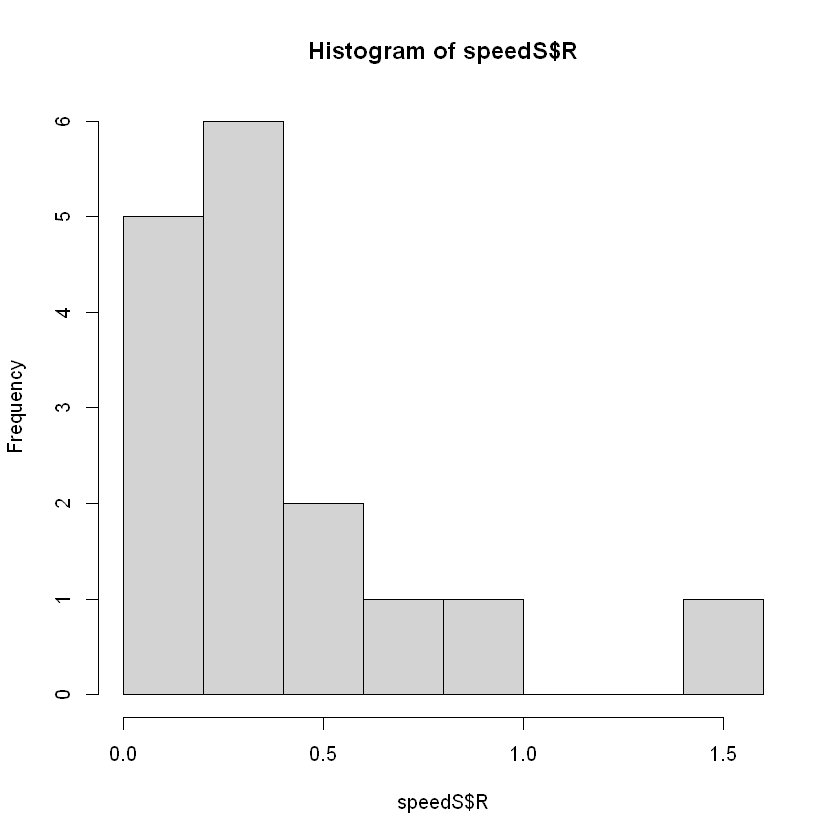

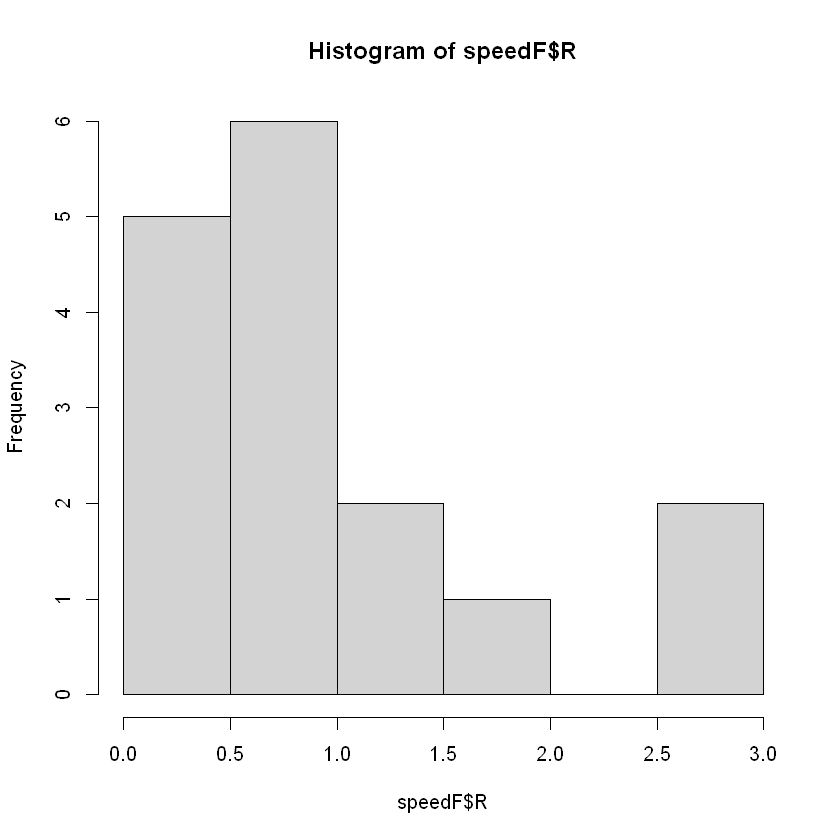

In [23]:
hist(speedS$R, breaks = 10)
hist(speedF$R, breaks = 10)

#numOrAct

In [33]:
num = subset(dataRandomTry, numOrAct == "num")
act = subset(dataRandomTry, numOrAct == "act")
num
# num = num[,c("subject","R")]
# act = act[,c("subject","R")]

,subject,speed,numOrAct,R,RNG,NSQ,RNG2,TPI,runs,coupon,⋯,X.34,mean.repetition.gap,median.repetition.gap,modal.repetition.gap,Phi.index.values..orders.2.to.7.,X.35,X.36,X.37,X.38,X.39
,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,s,num,0.8557,0.5690,0.0000,0.5791,100.6645,0.6467,8.82,⋯,1,5.97,6,5,-5.625409,-7.765057,-6.098775,-6.379558,-3.074461,-2.684844
2,1,f,num,0.8212,0.5794,0.0000,0.5684,100.3311,0.7209,9.74,⋯,2,5.98,6,5,-4.779627,-5.883110,-5.536043,-4.506390,-2.554742,-2.004027
5,2,s,num,0.3257,0.5718,0.0000,0.5755,90.5000,0.7176,8.54,⋯,0,5.99,6,5,-3.413783,-6.978352,-7.515234,-7.042542,-1.700914,-1.339166
6,2,f,num,0.5441,0.5794,0.0000,0.5621,82.8947,0.9880,9.77,⋯,0,5.98,6,1,-0.486516,-4.132938,-3.750226,-3.825830,-3.787767,-3.088955
13,4,s,num,0.3068,0.5591,0.0000,0.5615,89.5000,0.8239,11.00,⋯,3,5.97,5,1,-1.687797,-4.801892,-2.821249,-4.061913,-1.856127,-1.226355
14,4,f,num,0.3686,0.5609,0.0000,0.5553,79.0000,1.1591,11.19,⋯,2,5.97,5,1,0.724953,-3.715811,-3.875391,-2.235649,-3.069040,-2.514887
17,5,s,num,0.2720,0.5872,5.7143,0.5645,107.1429,0.6733,8.39,⋯,0,5.99,6,5,-7.611763,-6.859304,-5.187552,-5.743298,-1.780279,-2.237021
18,5,f,num,0.5125,0.5933,5.7143,0.5693,92.6910,1.0134,8.88,⋯,0,5.97,6,6,-7.196795,-4.560517,-4.093606,-4.806949,-3.946604,-0.070660
21,6,s,num,0.1883,0.6011,17.1429,0.5746,93.1894,0.9286,8.54,⋯,1,5.96,6,5,-8.579313,-8.360454,-6.475477,-5.694118,-2.475750,-0.237568


In [43]:
dataRandomTry

,subject,speed,numOrAct,R,RNG,NSQ,RNG2,TPI,runs,coupon,⋯,X.34,mean.repetition.gap,median.repetition.gap,modal.repetition.gap,Phi.index.values..orders.2.to.7.,X.35,X.36,X.37,X.38,X.39
,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,s,num,0.8557,0.5690,0.0000,0.5791,100.6645,0.6467,8.82,⋯,1,5.97,6,5,-5.625409,-7.765057,-6.098775,-6.379558,-3.074461,-2.684844
2,1,f,num,0.8212,0.5794,0.0000,0.5684,100.3311,0.7209,9.74,⋯,2,5.98,6,5,-4.779627,-5.883110,-5.536043,-4.506390,-2.554742,-2.004027
3,1,s,act,0.6296,0.5637,0.0000,0.5464,91.2371,0.7658,11.60,⋯,4,5.95,5,1,-1.925590,-3.151447,-4.676675,-2.599943,-0.293552,-1.795716
4,1,f,act,0.8012,0.6038,2.8571,0.5530,97.6271,0.9441,12.95,⋯,3,5.95,5,3,-6.055490,-4.049404,-1.494609,-3.011894,-1.780598,-0.595734
5,2,s,num,0.3257,0.5718,0.0000,0.5755,90.5000,0.7176,8.54,⋯,0,5.99,6,5,-3.413783,-6.978352,-7.515234,-7.042542,-1.700914,-1.339166
6,2,f,num,0.5441,0.5794,0.0000,0.5621,82.8947,0.9880,9.77,⋯,0,5.98,6,1,-0.486516,-4.132938,-3.750226,-3.825830,-3.787767,-3.088955
7,2,s,act,0.3267,0.5762,0.0000,0.5652,88.3224,0.8588,12.91,⋯,6,5.96,5,1,-1.107737,-1.273240,-1.891088,-2.889044,-2.457473,-2.805451
8,2,f,act,0.1787,0.5815,0.0000,0.5588,78.0000,0.4802,15.94,⋯,8,5.79,4,1,4.351554,0.349138,-1.026613,1.174050,-1.530503,-2.290337
13,4,s,num,0.3068,0.5591,0.0000,0.5615,89.5000,0.8239,11.00,⋯,3,5.97,5,1,-1.687797,-4.801892,-2.821249,-4.061913,-1.856127,-1.226355


Warning message in asin(sqrt(num$R)):
"NaNs produced"


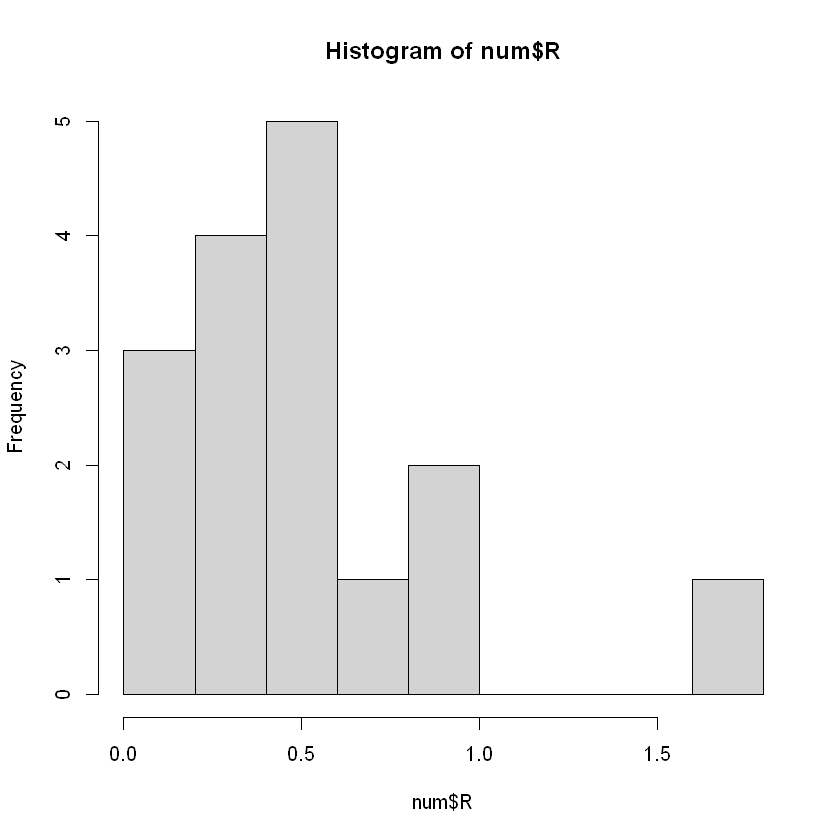

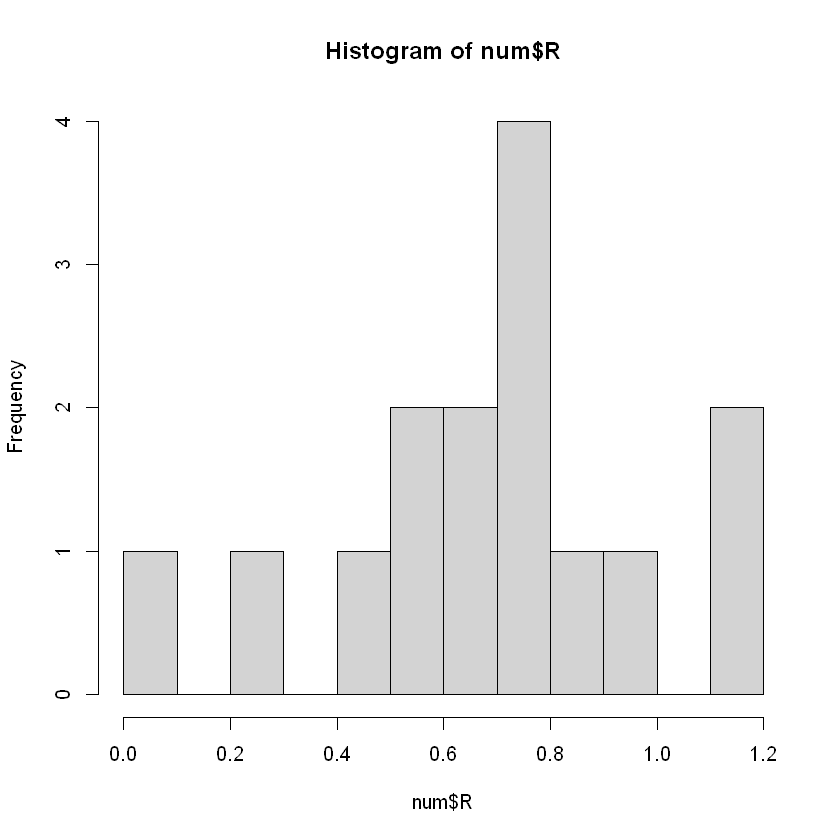

In [46]:
hist(num$R, breaks = 10)
num$R = asin(sqrt(num$R))
hist(num$R, breaks = 10)
# hist(act$R)

In [45]:
snum = subset(dataRandomTry, speed == "s" & numOrAct == "num")
fnum = subset(dataRandomTry, speed == "f", numOrAct == "num")
sact = subset(dataRandomTry, speed == "s", numOrAct == "act")
fact = subset(dataRandomTry, speed == "f", numOrAct == "act")
snum

,subject,speed,numOrAct,R,RNG,NSQ,RNG2,TPI,runs,coupon,⋯,X.34,mean.repetition.gap,median.repetition.gap,modal.repetition.gap,Phi.index.values..orders.2.to.7.,X.35,X.36,X.37,X.38,X.39
,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,s,num,0.8557,0.5690,0.0000,0.5791,100.6645,0.6467,8.82,⋯,1,5.97,6,5,-5.625409,-7.765057,-6.098775,-6.379558,-3.074461,-2.684844
5,2,s,num,0.3257,0.5718,0.0000,0.5755,90.5000,0.7176,8.54,⋯,0,5.99,6,5,-3.413783,-6.978352,-7.515234,-7.042542,-1.700914,-1.339166
13,4,s,num,0.3068,0.5591,0.0000,0.5615,89.5000,0.8239,11.00,⋯,3,5.97,5,1,-1.687797,-4.801892,-2.821249,-4.061913,-1.856127,-1.226355
17,5,s,num,0.2720,0.5872,5.7143,0.5645,107.1429,0.6733,8.39,⋯,0,5.99,6,5,-7.611763,-6.859304,-5.187552,-5.743298,-1.780279,-2.237021
21,6,s,num,0.1883,0.6011,17.1429,0.5746,93.1894,0.9286,8.54,⋯,1,5.96,6,5,-8.579313,-8.360454,-6.475477,-5.694118,-2.475750,-0.237568
25,7,s,num,0.4743,0.5884,8.5714,0.5673,100.1678,0.7798,10.00,⋯,3,5.99,5,6,-6.823191,-5.812610,-4.796957,-3.640556,-1.085025,0.763437
29,8,s,num,0.0065,0.5709,0.0000,0.5687,80.2326,1.0904,6.50,⋯,0,5.99,6,6,-2.133563,-6.307269,-6.776007,-6.928735,-4.424135,-4.201418
33,9,s,num,0.4601,0.5647,0.0000,0.5753,82.2742,0.9942,9.31,⋯,0,5.97,6,1,-0.154940,-7.129825,-6.142735,-6.280888,-3.195115,-3.424031


In [29]:
hist(snum$R, breaks = 10)
hist(fnum$R, breaks = 10)
hist(sact$R, breaks = 10)
hist(fact$R, breaks = 10)

ERROR: Error in hist.default(snum$R, breaks = 10): 'x' must be numeric


#simple main effect

#speed

In [ ]:
speedS = speedS[order(speedS$subject),]
speedF = speedF[order(speedF$subject),]
speedS = speedS[,c("R")]
speedF = speedF[,c("R")]
speed = cbind(speedS, speedF)
speed = as.data.frame(speed)
speed = gather(data = speed, key = speed, value = R, speedS, speedF)
speed$speed = factor(speed$speed)
speed

In [ ]:
#numOrAct 

In [ ]:
num = num[order(num$subject),]
act = act[order(act$subject),]
num = num[,c("R")]
act = act[,c("R")]
numOrAct = cbind(num, act)
numOrAct = as.data.frame(numOrAct)
numOrAct = gather(data = numOrAct, key = numOrAct, value = R, num, act)
numOrAct$numOrAct = factor(numOrAct$numOrAct)
numOrAct

#use wilcoxon test to do multiple comparison

#speed

In [ ]:
multiSpeed = wilcox.test(dataRandomTry[dataRandomTry$speed == "s",]$R, dataRandomTry[dataRandomTry$speed == "f",]$R, paired = TRUE)
multiSpeed
multiNumOrAct = wilcox.test(dataRandomTry[dataRandomTry$numOrAct == "num",]$R, dataRandomTry[dataRandomTry$numOrAct == "act",]$R, paired = TRUE)
multiNumOrAct

#### effect size

In [ ]:
effsizeSpeed <- wilcox_effsize(dataRandomTry, R ~ speed, paired = TRUE, conf.level = 0.95)
effsizeSpeed

### Calculate bootstrapped standard errors for each participant

In [ ]:
se_df <- ddply(dataRandomTry, .(subject, speed, numOrAct), summarise, se = sd(R)/sqrt(length(R)))
se_df$se[is.na(se_df$se)] <- 0  # Replace NAs with zeros

### Merge the standard error data with the original data

In [ ]:
dataRandomTry <- merge(dataRandomTry, se_df, by = c("subject", "speed", "numOrAct"))

### Plot the data with error bars

In [ ]:
ggplot(dataRandomTry, aes(x = numOrAct, y = R, color = speed, group = interaction(speed, subject))) +
  geom_point(size = 3, position = position_dodge(width = 0.8)) +
  geom_errorbar(aes(ymin = R - se, ymax = R + se), position = position_dodge(width = 0.8), width = 0.2) +
  facet_wrap(~subject, scales = "free") +
  labs(x = "numOrAct", y = "R", color = "speed") +
  theme_classic() +
  theme(legend.position = "bottom")